In [11]:
import pandas as pd
import numpy as np
import pickle
import os
import math
import warnings
import re
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

baseball_path = r"C:\Users\james\Documents\MLB\Data"

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, classification_report, f1_score, make_scorer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [13]:
sample = pd.read_csv(os.path.join(baseball_path, "Inputs", "Sample.csv"))

In [14]:
sample['imp_b'] = np.where(sample['pa_b_long'] < 40, 1, 0)
sample['imp_p'] = np.where(sample['pa_p_long'] < 40, 1, 0)

# Models
Uncomment out code below to recreate models

# Advanced stat models
These simply predict wOBA, SLG, and OBP from known "normal" stats like so_b_long, b1_b_long, hr_p_long, etc

In [15]:
# Rename _b_long stats to just the simple name so the model will be able to use the fangraphs imputations
simple_list = ['so', 'b1', 'b2', 'b3', 'hr', 'bb', 'hbp', 'lo', 'po', 'go', 'fo']
advanced_sample = sample.copy()
advanced_sample.drop(columns=simple_list, inplace=True)
for stat in simple_list:
    long_name = stat + "_b_long"
    advanced_sample[stat] = advanced_sample[long_name]
    
advanced_sample

,Unnamed: 0,index,atBatIndex,inning,halfInning,outs,type,id,event,eventType,...,b1,b2,b3,hr,bb,hbp,lo,po,go,fo
0,0,11736,51,6,bottom,1,atBat,493114,Groundout,field_out,...,0.276596,0.042553,0.000000,0.000000,0.106383,0.000000,0.063830,0.021277,0.319149,0.063830
1,1,11737,52,6,bottom,2,atBat,605412,Groundout,field_out,...,0.170732,0.048780,0.024390,0.000000,0.097561,0.000000,0.073171,0.024390,0.268293,0.097561
2,2,11738,53,6,bottom,3,atBat,434636,Groundout,field_out,...,0.195122,0.097561,0.024390,0.000000,0.073171,0.000000,0.073171,0.000000,0.390244,0.048780
3,3,11763,78,9,bottom,1,atBat,493114,Groundout,field_out,...,0.270833,0.041667,0.000000,0.000000,0.104167,0.000000,0.062500,0.020833,0.333333,0.062500
4,4,11764,79,9,bottom,1,atBat,605412,Double,double,...,0.166667,0.047619,0.023810,0.000000,0.095238,0.000000,0.071429,0.023810,0.285714,0.095238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128778,1128778,1364447,30,4,bottom,2,atBat,660707,Single,single,...,0.119048,0.063492,0.007937,0.031746,0.031746,0.007937,0.023810,0.031746,0.190476,0.142857
1128779,1128779,1364448,31,4,bottom,3,atBat,602074,Flyout,field_out,...,0.196667,0.040000,0.000000,0.006667,0.070000,0.013333,0.046667,0.023333,0.296667,0.130000
1128780,1128780,1364449,32,5,top,1,atBat,671277,Groundout,field_out,...,0.160194,0.063107,0.000000,0.009709,0.019417,0.000000,0.067961,0.009709,0.339806,0.067961
1128781,1128781,1364450,33,5,top,2,atBat,645302,Flyout,field_out,...,0.183333,0.033333,0.006667,0.010000,0.090000,0.033333,0.046667,0.070000,0.180000,0.116667


In [16]:
batter_list = ['so_b_long', 'b1_b_long', 'b2_b_long', 'b3_b_long', 'hr_b_long', 'bb_b_long', 'hbp_b_long', 'lo_b_long', 'po_b_long', 'go_b_long', 'fo_b_long']

# wOBA
woba_reg = LinearRegression().fit(advanced_sample[batter_list], advanced_sample['woba_b_long'])
# advanced_sample['woba'] = woba_reg.predict(advanced_sample[batter_list])
filename = "woba_20220908.sav"
pickle.dump(woba_reg, open(filename, 'wb'))

# SLG
slg_reg = LinearRegression().fit(advanced_sample[batter_list], advanced_sample['slg_b_long'])
# advanced_sample['slg'] = slg_reg.predict(advanced_sample[batter_list])
filename = "slg_20220908.sav"
pickle.dump(slg_reg, open(filename, 'wb'))

# OBP
obp_reg = LinearRegression().fit(advanced_sample[batter_list], advanced_sample['obp_b_long'])
# advanced_sample['obp'] = obp_reg.predict(advanced_sample[batter_list])
filename = "obp_20220908.sav"
pickle.dump(obp_reg, open(filename, 'wb'))

In [17]:
# These lists came from B. Dataset. They were created by the code more organically, but I copied and pasted them here so I could use them

# Inputs
batter_stats = ['so_b', 'b1_b', 'b2_b', 'b3_b', 'hr_b', 'bb_b', 'hbp_b', 'lo_b', 'po_b', 'go_b', 'fo_b', 'pa_b', 'ab_b']
pitcher_stats = ['so_p', 'b1_p', 'b2_p', 'b3_p', 'hr_p', 'bb_p', 'hbp_p', 'lo_p', 'po_p', 'go_p', 'fo_p', 'pa_p', 'ab_p']
dummy_list = ['venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_7', 'venue_10', 'venue_12', 'venue_13', 'venue_14', 'venue_15',
 'venue_16', 'venue_17', 'venue_19', 'venue_22', 'venue_31', 'venue_32', 'venue_680', 'venue_2392', 'venue_2394', 'venue_2395', 'venue_2535',
 'venue_2536', 'venue_2602', 'venue_2680', 'venue_2681', 'venue_2701', 'venue_2735', 'venue_2756', 'venue_2889', 'venue_3289', 'venue_3309',
 'venue_3312', 'venue_3313', 'venue_4169', 'venue_4705', 'venue_5010', 'venue_5325', 'venue_5365', 'venue_5381', 'venue_5445', 
 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022']

In [25]:
# All long variables (larger rolling average)
long_list = [ 'so_b_long', 'b1_b_long', 'b2_b_long', 'b3_b_long', 'hr_b_long', 'bb_b_long', 'hbp_b_long', 'lo_b_long', 'po_b_long', 'go_b_long', 'fo_b_long', 'pa_b_long', 'ab_b_long', 
              'so_p_long', 'b1_p_long', 'b2_p_long', 'b3_p_long', 'hr_p_long', 'bb_p_long', 'hbp_p_long', 'lo_p_long', 'po_p_long', 'go_p_long', 'fo_p_long', 'pa_p_long', 'ab_p_long', 
              'woba_b_long', 'woba_p_long', 'slg_b_long', 'slg_p_long', 'obp_b_long', 'obp_p_long']


# Create list of inputs
# These are the inputs not otherwise included
other_list = ['p_L', 'b_L',
              'x_vect', 'y_vect', 'temperature', 
              'woba_b', 'woba_p', 'slg_b', 'slg_p', 'obp_b', 'obp_p', 
              'onFirst', 'onSecond', 'onThird',
              'inning', 'top', 'score_diff',
              'imp_b', 'imp_p'
             ]
# Batter stats, pitcher stats, these other stats, park dummies
# x_list = batter_stats + pitcher_stats + long_list + other_list + dummy_list

x_list = ['so_b', 'b1_b', 'b2_b', 'b3_b', 'hr_b', 'bb_b', 'hbp_b', 'lo_b', 'po_b', 'go_b', 'fo_b',
          'so_p', 'b1_p', 'b2_p', 'b3_p', 'hr_p', 'bb_p', 'hbp_p', 'lo_p', 'po_p', 'go_p', 'fo_p',
          'so_b_long', 'b1_b_long', 'b2_b_long', 'b3_b_long', 'hr_b_long', 'bb_b_long', 'hbp_b_long', 'lo_b_long', 'po_b_long', 'go_b_long', 'fo_b_long', 
          'so_p_long', 'b1_p_long', 'b2_p_long', 'b3_p_long', 'hr_p_long', 'bb_p_long', 'hbp_p_long', 'lo_p_long', 'po_p_long', 'go_p_long', 'fo_p_long',
          'slg_b_long', 'slg_p_long', 'obp_b_long', 'obp_p_long', 
          'p_L', 'b_L', 
          'x_vect', 'y_vect', 'temperature',
          'slg_b', 'slg_p', 'obp_b', 'obp_p', 
          'onFirst', 'onSecond', 'onThird', 'inning', 'top', 'score_diff', 'imp_b', 'imp_p',
          'venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_7', 'venue_10', 'venue_12', 'venue_13', 'venue_14', 'venue_15', 'venue_16', 'venue_17', 'venue_19', 
          'venue_22', 'venue_31', 'venue_32', 'venue_680', 'venue_2392', 'venue_2394', 'venue_2395', 'venue_2535', 'venue_2536', 'venue_2602', 'venue_2680', 'venue_2681', 
          'venue_2701', 'venue_2735', 'venue_2756', 'venue_2889', 'venue_3289', 'venue_3309', 'venue_3312', 'venue_3313', 'venue_4169', 'venue_4705', 'venue_5010', 'venue_5325', 
          'venue_5365', 'venue_5381', 'venue_5445', 
          'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022']

###### Getting rid of small samples when training
sample = sample.query('pa_b_long >= 40').query('pa_p_long >= 40')
# Imp will always be 0 now, but whatever

# Predict event
y = sample['eventsModel']
# With selected inputs
X = sample[x_list]

KeyError: "['year_2013', 'year_2014'] not in index"

In [26]:
# All long variables (larger rolling average)
long_list = [ 'so_b_long', 'b1_b_long', 'b2_b_long', 'b3_b_long', 'hr_b_long', 'bb_b_long', 'hbp_b_long', 'lo_b_long', 'po_b_long', 'go_b_long', 'fo_b_long', 'pa_b_long', 'ab_b_long', 
              'so_p_long', 'b1_p_long', 'b2_p_long', 'b3_p_long', 'hr_p_long', 'bb_p_long', 'hbp_p_long', 'lo_p_long', 'po_p_long', 'go_p_long', 'fo_p_long', 'pa_p_long', 'ab_p_long', 
              'woba_b_long', 'woba_p_long', 'slg_b_long', 'slg_p_long', 'obp_b_long', 'obp_p_long']


# Create list of inputs
# These are the inputs not otherwise included
other_list = ['p_L', 'b_L',
              'x_vect', 'y_vect', 'temperature', 
              'woba_b', 'woba_p', 'slg_b', 'slg_p', 'obp_b', 'obp_p', 
              'onFirst', 'onSecond', 'onThird',
              'inning', 'top', 'score_diff',
              'imp_b', 'imp_p'
             ]
# Batter stats, pitcher stats, these other stats, park dummies
# x_list = batter_stats + pitcher_stats + long_list + other_list + dummy_list

x_list = ['so_b', 'b1_b', 'b2_b', 'b3_b', 'hr_b', 'bb_b', 'hbp_b', 'lo_b', 'po_b', 'go_b', 'fo_b', 'hard_hit_b',
          'so_p', 'b1_p', 'b2_p', 'b3_p', 'hr_p', 'bb_p', 'hbp_p', 'lo_p', 'po_p', 'go_p', 'fo_p', 'hard_hit_p',
          'so_b_long', 'b1_b_long', 'b2_b_long', 'b3_b_long', 'hr_b_long', 'bb_b_long', 'hbp_b_long', 'lo_b_long', 'po_b_long', 'go_b_long', 'fo_b_long', 'hard_hit_b_long',
          'so_p_long', 'b1_p_long', 'b2_p_long', 'b3_p_long', 'hr_p_long', 'bb_p_long', 'hbp_p_long', 'lo_p_long', 'po_p_long', 'go_p_long', 'fo_p_long', 'hard_hit_p_long',
          'slg_b_long', 'slg_p_long', 'obp_b_long', 'obp_p_long',
          'p_L', 'b_L', 
          'x_vect', 'y_vect', 'temperature',
          'slg_b', 'slg_p', 'obp_b', 'obp_p', 
          'onFirst', 'onSecond', 'onThird', 'inning', 'top', 'score_diff', 'imp_b', 'imp_p',
          'venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_7', 'venue_10', 'venue_12', 'venue_13', 'venue_14', 'venue_15', 'venue_16', 'venue_17', 'venue_19', 
          'venue_22', 'venue_31', 'venue_32', 'venue_680', 'venue_2392', 'venue_2394', 'venue_2395', 'venue_2535', 'venue_2536', 'venue_2602', 'venue_2680', 'venue_2681', 
          'venue_2701', 'venue_2735', 'venue_2756', 'venue_2889', 'venue_3289', 'venue_3309', 'venue_3312', 'venue_3313', 'venue_4169', 'venue_4705', 'venue_5010', 'venue_5325', 
          'venue_5365', 'venue_5381', 'venue_5445', 
          'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022']

###### Getting rid of small samples when training
sample = sample.query('pa_b_long >= 40').query('pa_p_long >= 40')
# Imp will always be 0 now, but whatever

# Predict event
y = sample['eventsModel']
# With selected inputs
X = sample[x_list]

# Actual
Uncomment this code below to recreate the model

In [9]:
print(len(x_list))

116


In [9]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(200,200,200), activation='relu', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_200200200r.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.27357968538543426
2.003323435387892


In [13]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_8080r.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.2730705489071527
2.0045412419740303


In [24]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(220,220,220), activation='logistic', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_220220220l.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.27507986261605993
1.998273317192844


In [12]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(250,250,250), activation='logistic', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_250250250l.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.27549326482212344
1.997017800825198


In [22]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(180,180,180), activation='tanh', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_180180180t.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.2718448770321607
2.017165974787236


In [23]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(150,150,150), activation='tanh', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_150150150t.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.2716327010629039
2.0152048167373415


In [11]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(200,200,200), activation='logistic', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_200200200l.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.27546532508323784
1.9972851273195376


In [12]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(200,200,200), activation='tanh', random_state=1,max_iter=200).fit(X,y)

filename = "nn_pa_200200200t.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.27046162678864405
2.0188318542698607


In [13]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(130,130,130), activation='relu', random_state=1,max_iter=200).fit(X,y)

filename = "nn_130130130r.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.2724550040824423
2.003986233674312


In [14]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(130,130,130), activation='logistic', random_state=1,max_iter=200).fit(X,y)

filename = "nn_130130130l.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.27534309627230064
1.9972076679276094


In [11]:
# Create model
model = MLPClassifier(hidden_layer_sizes=(130,130,130), activation='tanh', random_state=1,max_iter=200).fit(X,y)

filename = "nn_130130130t.sav"
pickle.dump(model, open(filename, 'wb'))

print(model.score(X, y))
print(model.loss_)

0.2724172877636388
2.0127275099458926


In [4]:
# x_list = ['so_b', 'b1_b', 'b2_b', 'b3_b', 'hr_b', 'bb_b', 'hbp_b', 'lo_b', 'po_b', 'go_b', 'fo_b', 'pa_b', 'ab_b', 
#           'so_p', 'b1_p', 'b2_p', 'b3_p', 'hr_p', 'bb_p', 'hbp_p', 'lo_p', 'po_p', 'go_p', 'fo_p', 'pa_p', 'ab_p', 
#           'so_b_long', 'b1_b_long', 'b2_b_long', 'b3_b_long', 'hr_b_long', 'bb_b_long', 'hbp_b_long', 'lo_b_long', 'po_b_long', 'go_b_long', 'fo_b_long', 'pa_b_long', 'ab_b_long', 
#           'so_p_long', 'b1_p_long', 'b2_p_long', 'b3_p_long', 'hr_p_long', 'bb_p_long', 'hbp_p_long', 'lo_p_long', 'po_p_long', 'go_p_long', 'fo_p_long', 'pa_p_long', 'ab_p_long', 
#           'woba_b_long', 'woba_p_long', 'slg_b_long', 'slg_p_long', 'obp_b_long', 'obp_p_long', 'p_L', 'b_L', 
#           'x_vect', 'y_vect', 'temperature', 'woba_b', 'woba_p', 'slg_b', 'slg_p', 'obp_b', 'obp_p', 'onFirst', 'onSecond', 'onThird', 'inning', 'top', 'score_diff', 'imp_b', 'imp_p',
#           'venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_7', 'venue_10', 'venue_12', 'venue_13', 'venue_14', 'venue_15', 'venue_16', 'venue_17', 'venue_19', 
#           'venue_22', 'venue_31', 'venue_32', 'venue_680', 'venue_2392', 'venue_2394', 'venue_2395', 'venue_2535', 'venue_2536', 'venue_2602', 'venue_2680', 'venue_2681', 
#           'venue_2701', 'venue_2735', 'venue_2756', 'venue_2889', 'venue_3289', 'venue_3309', 'venue_3312', 'venue_3313', 'venue_4169', 'venue_4705', 'venue_5010', 'venue_5325', 
#           'venue_5365', 'venue_5381', 'venue_5445', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022']


# Test
Uncomment out this code to test a model

In [10]:
# x_list = ['so_b', 'b1_b', 'b2_b', 'b3_b', 'hr_b', 'bb_b', 'hbp_b', 'lo_b', 'po_b', 'go_b', 'fo_b', 'pa_b', 'ab_b', 
#           'so_p', 'b1_p', 'b2_p', 'b3_p', 'hr_p', 'bb_p', 'hbp_p', 'lo_p', 'po_p', 'go_p', 'fo_p', 'pa_p', 'ab_p', 
#           'so_b_long', 'b1_b_long', 'b2_b_long', 'b3_b_long', 'hr_b_long', 'bb_b_long', 'hbp_b_long', 'lo_b_long', 'po_b_long', 'go_b_long', 'fo_b_long', 'pa_b_long', 'ab_b_long', 
#           'so_p_long', 'b1_p_long', 'b2_p_long', 'b3_p_long', 'hr_p_long', 'bb_p_long', 'hbp_p_long', 'lo_p_long', 'po_p_long', 'go_p_long', 'fo_p_long', 'pa_p_long', 'ab_p_long', 
#           'woba_b_long', 'woba_p_long', 'slg_b_long', 'slg_p_long', 'obp_b_long', 'obp_p_long', 'p_L', 'b_L', 
#           'x_vect', 'y_vect', 'temperature', 'woba_b', 'woba_p', 'slg_b', 'slg_p', 'obp_b', 'obp_p', 'onFirst', 'onSecond', 'onThird', 'inning', 'top', 'score_diff', 'imp_b', 'imp_p',
#           'venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_7', 'venue_10', 'venue_12', 'venue_13', 'venue_14', 'venue_15', 'venue_16', 'venue_17', 'venue_19', 
#           'venue_22', 'venue_31', 'venue_32', 'venue_680', 'venue_2392', 'venue_2394', 'venue_2395', 'venue_2535', 'venue_2536', 'venue_2602', 'venue_2680', 'venue_2681', 
#           'venue_2701', 'venue_2735', 'venue_2756', 'venue_2889', 'venue_3289', 'venue_3309', 'venue_3312', 'venue_3313', 'venue_4169', 'venue_4705', 'venue_5010', 'venue_5325', 
#           'venue_5365', 'venue_5381', 'venue_5445', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022']



In [22]:
# Comment out previous cell and uncomment this and following to test models
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# y_pred = mlp.predict(X_test)
# print(classification_report(y_test, y_pred))

In [24]:
# X_train = X_train.values
model = MLPClassifier(hidden_layer_sizes=(50), activation='relu', random_state=1,max_iter=200).fit(X_train, y_train)
preds = model.predict_proba(X_test)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))


C:\Users\james\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train score: 0.2678398591005495
Test score: 0.2681188405874915


In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(cv=5,
                           estimator=MLPClassifier(max_iter=100),
                           param_grid={'hidden_layer_sizes': [(50)],
                           'activation': ['relu'],
                           'alpha': [0.001]},
                           scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1, verbose=5)    

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameter setting
print(grid_search.best_params_)
print(grid_search.best_score_)

# model = MLPClassifier(hidden_layer_sizes=(200,200,200), activation='relu', random_state=1,max_iter=500).fit(X_train_scaled, y_train)
# preds = model.predict_proba(X_test)

# print("Train score:", model.score(X_train_scaled, y_train))
# print("Test score:", model.score(X_test_scaled, y_test))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [16]:
# Create a GridSearchCV object
grid_search = GridSearchCV(cv=5,
                           estimator=MLPClassifier(max_iter=200),
                           param_grid={'hidden_layer_sizes': [(150,150,100), (200,200), (200,200,200), (150,150)],
                           'activation': ['relu', 'tanh'],
                           'alpha': [0.001]},
                           scoring=make_scorer(f1_score, average='weighted'), n_jobs=-3, verbose=3)    

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameter setting
print(grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
# Fitting 5 folds for each of 3 candidates, totalling 15 fits

# {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 200, 200)}
# {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}
# {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,)}

In [41]:
from sklearn.inspection import permutation_importance

# fit your MLP classifier model
model.fit(X_train, y_train)

# calculate feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# print feature importance scores
print(result.importances_mean)

[ 1.46831012e-03  7.34783082e-05 -2.72141882e-06 -1.15136950e-05
 -1.52818134e-05  2.53301290e-05  2.32367299e-05  1.01320516e-04
  2.95169272e-05  2.48486472e-04  3.93559030e-05  1.10133726e-03
  9.77617377e-05  2.93075873e-06 -1.54911533e-05  2.05153111e-05
  6.04992338e-05 -1.38164340e-05 -1.86312519e-05  7.01288696e-05
  6.11063196e-04  6.13365935e-05  6.21781399e-03  3.08776366e-04
 -2.30273900e-05  3.32850456e-05  1.61191730e-05  3.45410851e-05
 -1.10950152e-05  1.72286745e-04  1.00483157e-05  1.21124072e-03
 -2.15620107e-05  2.21251350e-03  1.24557246e-04 -4.45894007e-05
  2.99356070e-05  2.70048483e-05  6.21739531e-05  5.90338545e-05
  6.80354706e-05  1.90289978e-04  2.10826223e-03  1.88196579e-04
  7.11755692e-05  5.42190365e-05  1.08856753e-05  1.80032322e-05
 -3.74718438e-05  1.51980774e-04  1.47793976e-04  8.24799243e-05
  9.69243781e-05  3.95652429e-05  3.26570259e-05  3.39130653e-05
 -6.15459334e-05  1.91818159e-03  1.04565285e-03  9.80548136e-04
  1.90583054e-03  1.77520

In [42]:
importance_dict = dict(zip(X_test.columns, result.importances_mean))
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_importances)

[('so_b_long', 0.006217813988930082), ('so_p_long', 0.0022125135024241294), ('go_p_long', 0.002108262227544072), ('onFirst', 0.0019181815898109856), ('inning', 0.0019058305351565218), ('so_b', 0.001468310124515365), ('go_b_long', 0.0012112407157749971), ('so_p', 0.0011013372633412177), ('onSecond', 0.0010456528474414196), ('onThird', 0.0009805481356187362), ('go_p', 0.0006110631955318357), ('score_diff', 0.00046619997822862634), ('year_2021', 0.0003351531949456754), ('b1_b_long', 0.0003087763663615739), ('go_b', 0.0002484864724550284), ('po_p_long', 0.00019028997764247713), ('fo_p_long', 0.0001881965785484996), ('top', 0.00017752024316922133), ('lo_b_long', 0.0001722867454342747), ('year_2016', 0.00015407417331667062), ('b_L', 0.0001519807742226986), ('year_2015', 0.00014821265585354682), ('x_vect', 0.00014779397603474908), ('venue_19', 0.00013000008373595384), ('b1_p_long', 0.00012455724609160556), ('venue_7', 0.00012037044790365048), ('year_2013', 0.00011890506853786675), ('venue_260

<AxesSubplot:>

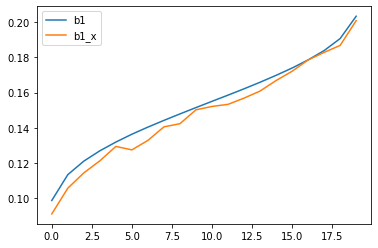

In [43]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['b1'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['b1', 'b1_x']].plot.line()

<AxesSubplot:>

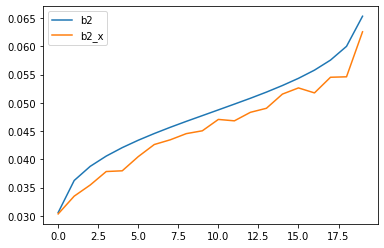

In [44]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['b2'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['b2', 'b2_x']].plot.line()

<AxesSubplot:>

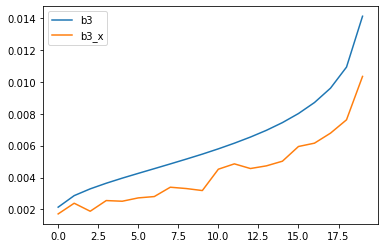

In [45]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['b3'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['b3', 'b3_x']].plot.line()

<AxesSubplot:>

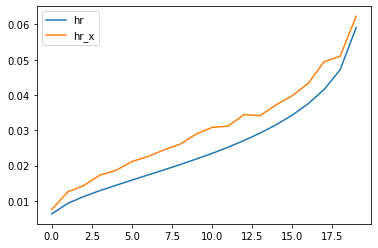

In [46]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['hr'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['hr', 'hr_x']].plot.line()

<AxesSubplot:>

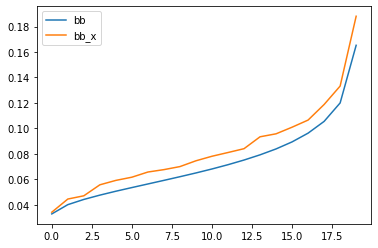

In [47]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['bb'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['bb', 'bb_x']].plot.line()

<AxesSubplot:>

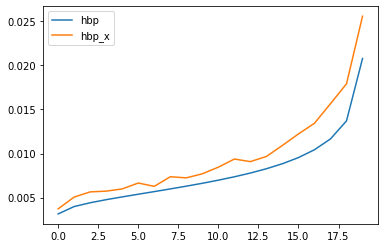

In [31]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['hbp'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['hbp', 'hbp_x']].plot.line()

<AxesSubplot:>

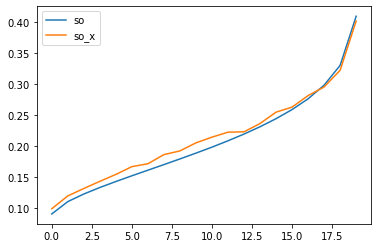

In [32]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['so'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['so', 'so_x']].plot.line()

<AxesSubplot:>

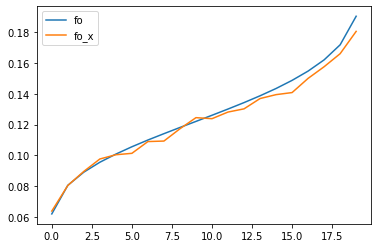

In [33]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['fo'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['fo', 'fo_x']].plot.line()

<AxesSubplot:>

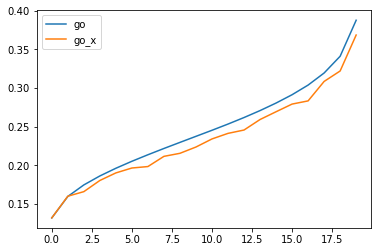

In [34]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['go'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['go', 'go_x']].plot.line()

<AxesSubplot:>

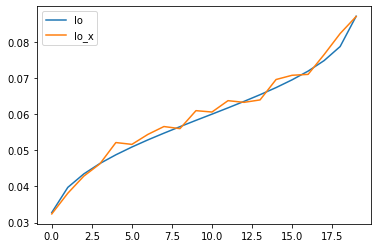

In [35]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['lo'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['lo', 'lo_x']].plot.line()

<AxesSubplot:>

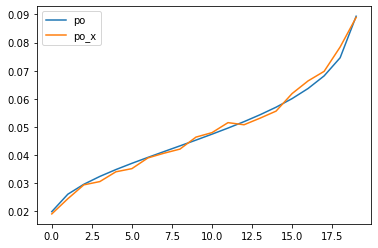

In [36]:
test = gooddf.copy()
test['decile'] = pd.qcut(test['po'], 20, labels=False)
test = test.groupby('decile').mean().reset_index()

test[['po', 'po_x']].plot.line()

In [345]:
len(x_list)

116

In [9]:
[('so_b_long', 0.006217813988930082), ('so_p_long', 0.0022125135024241294), ('go_p_long', 0.002108262227544072), ('onFirst', 0.0019181815898109856), ('inning', 0.0019058305351565218), ('so_b', 0.001468310124515365), ('go_b_long', 0.0012112407157749971), ('so_p', 0.0011013372633412177), ('onSecond', 0.0010456528474414196), ('onThird', 0.0009805481356187362), ('go_p', 0.0006110631955318357), ('score_diff', 0.00046619997822862634), ('year_2021', 0.0003351531949456754), ('b1_b_long', 0.0003087763663615739), ('go_b', 0.0002484864724550284), ('po_p_long', 0.00019028997764247713), ('fo_p_long', 0.0001881965785484996), ('top', 0.00017752024316922133), ('lo_b_long', 0.0001722867454342747), ('year_2016', 0.00015407417331667062), ('b_L', 0.0001519807742226986), ('year_2015', 0.00014821265585354682), ('x_vect', 0.00014779397603474908), ('venue_19', 0.00013000008373595384), ('b1_p_long', 0.00012455724609160556), ('venue_7', 0.00012037044790365048), ('year_2013', 0.00011890506853786675), ('venue_2602', 0.00011597430980629375), ('year_2022', 0.00011492761025930776), ('venue_2', 0.00011157817170895368), ('lo_b', 0.00010132051614845095), ('b1_p', 9.776173768870633e-05), ('temperature', 9.692437805111087e-05), ('venue_31', 9.692437805110532e-05), ('year_2019', 9.169088031617534e-05), ('venue_10', 9.106286058796487e-05), ('y_vect', 8.247992430267526e-05), ('b1_b', 7.347830819856571e-05), ('slg_b_long', 7.117556919519207e-05), ('po_p', 7.012886964820609e-05), ('venue_3289', 6.929151001060508e-05), ('lo_p_long', 6.803547055422854e-05), ('venue_14', 6.803547055422854e-05), ('year_2014', 6.7826130644838e-05), ('bb_p_long', 6.217395309109364e-05), ('fo_p', 6.133659345349817e-05), ('bb_p', 6.049923381591382e-05), ('hbp_p_long', 5.903385445012455e-05), ('slg_p_long', 5.4219036533981194e-05), ('venue_2681', 5.2544317258795824e-05), ('venue_680', 5.128827780241374e-05), ('venue_2395', 5.128827780241374e-05), ('year_2018', 4.333336124529574e-05), ('venue_2889', 4.082128233252602e-05), ('slg_b', 3.956524287614394e-05), ('fo_b', 3.9355902966747847e-05), ('venue_3313', 3.5378444688188845e-05), ('bb_b_long', 3.454108505059339e-05), ('venue_4', 3.412240523179566e-05), ('obp_b', 3.3913065322399574e-05), ('b3_b_long', 3.3285045594216855e-05), ('venue_12', 3.3075705684809664e-05), ('slg_p', 3.265702586601194e-05), ('b3_p_long', 2.9935607043857226e-05), ('po_b', 2.9516927225048396e-05), ('year_2020', 2.826088776866076e-05), ('venue_16', 2.742352813107085e-05), ('hr_p_long', 2.7004848312273123e-05), ('bb_b', 2.5330129037087757e-05), ('venue_32', 2.5120789127702768e-05), ('hbp_b', 2.3236729943121313e-05), ('venue_2392', 2.239937030553696e-05), ('venue_3312', 2.1980690486722577e-05), ('venue_1', 2.156201066793595e-05), ('hr_p', 2.0515311120949952e-05), ('venue_3', 1.884059184577569e-05), ('obp_p_long', 1.8003232208191332e-05), ('hr_b_long', 1.6119173023598778e-05), ('venue_4169', 1.5281813386003318e-05), ('venue_17', 1.1723034926253151e-05), ('obp_b_long', 1.0885675288657693e-05), ('po_b_long', 1.0048315651073336e-05), ('venue_2735', 9.420295922873967e-06), ('venue_5325', 9.210956013472327e-06), ('venue_2535', 7.536236738292512e-06), ('venue_2394', 7.117556919500334e-06), ('venue_2680', 5.442837644320519e-06), ('venue_5010', 4.186798187921781e-06), ('b2_p', 2.930758731556349e-06), ('venue_5365', 1.4653793657670722e-06), ('imp_b', 0.0), ('imp_p', 0.0), ('venue_5445', -1.6653345369377347e-17), ('venue_15', -2.0933990941274238e-07), ('venue_2756', -8.373596376176628e-07), ('b2_b', -2.7214188221824642e-06), ('venue_4705', -2.9307587315841045e-06), ('venue_2536', -4.39613809736783e-06), ('venue_2701', -4.396138097373381e-06), ('venue_5381', -6.070857372558747e-06), ('venue_13', -9.001616104120647e-06), ('hbp_b_long', -1.109501519809264e-05), ('b3_b', -1.1513695016890368e-05), ('hbp_p', -1.3816434020264001e-05), ('hr_b', -1.528181338605328e-05), ('b3_p', -1.5491153295443814e-05), ('venue_5', -1.6956532661238642e-05), ('lo_p', -1.8631251936407356e-05), ('fo_b_long', -2.156201066799146e-05), ('b2_b_long', -2.3027390033764084e-05), ('venue_3309', -3.642514423521925e-05), ('p_L', -3.74718437821997e-05), ('b2_p_long', -4.458940070173889e-05), ('year_2017', -5.045091816486269e-05), ('venue_22', -5.066025807426988e-05), ('obp_p', -6.154593336294423e-05)]


[('so_b_long', 0.006217813988930082),
 ('so_p_long', 0.0022125135024241294),
 ('go_p_long', 0.002108262227544072),
 ('onFirst', 0.0019181815898109856),
 ('inning', 0.0019058305351565218),
 ('so_b', 0.001468310124515365),
 ('go_b_long', 0.0012112407157749971),
 ('so_p', 0.0011013372633412177),
 ('onSecond', 0.0010456528474414196),
 ('onThird', 0.0009805481356187362),
 ('go_p', 0.0006110631955318357),
 ('score_diff', 0.00046619997822862634),
 ('year_2021', 0.0003351531949456754),
 ('b1_b_long', 0.0003087763663615739),
 ('go_b', 0.0002484864724550284),
 ('po_p_long', 0.00019028997764247713),
 ('fo_p_long', 0.0001881965785484996),
 ('top', 0.00017752024316922133),
 ('lo_b_long', 0.0001722867454342747),
 ('year_2016', 0.00015407417331667062),
 ('b_L', 0.0001519807742226986),
 ('year_2015', 0.00014821265585354682),
 ('x_vect', 0.00014779397603474908),
 ('venue_19', 0.00013000008373595384),
 ('b1_p_long', 0.00012455724609160556),
 ('venue_7', 0.00012037044790365048),
 ('year_2013', 0.00011890